## Projeto Analise Socieconomica em resultado de Provas de avaliação de ensino

Foi feito o entendimento da base de dados que consiste em 62 respostas de questões diversas sobre a vida escolar e socieconomicas de diversos estudantes.


In [8]:
import ClassesAnalise as CA

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [10]:
df = pd.read_csv('SARESP_train.csv')

C:\Users\lucia\AppData\Local\Temp\ipykernel_43168\652475977.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SARESP_train.csv')


Iniciando a etapa de Preparação dos Dados será feita:
- analise de nulos
- analise de correlação de features
- analise dos tipos de cada variavel
- analise de conteudo de variaveis

In [11]:
df.dtypes


CD_ALUNO              int64
NOMESC               object
Q1                   object
Q2                   object
Q3                   object
                     ...   
porc_ACERT_MAT      float64
porc_ACERT_CIE      float64
nivel_profic_lp      object
nivel_profic_mat     object
nivel_profic_cie     object
Length: 88, dtype: object

In [12]:
df.isna().sum().sort_values()

CD_ALUNO          0
Q58               0
Q57               0
Q56               0
Q55               0
              ...  
NEC_ESP_1    118206
NEC_ESP_2    120489
NEC_ESP_3    120520
NEC_ESP_4    120595
NEC_ESP_5    120596
Length: 88, dtype: int64

Será removida qualquer coluna com mais de 10% de dados faltantes

In [13]:
df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")

In [14]:
df = CA.typeEncoder(df,'object')

C:\Users\lucia\Desktop\Desenvolvimento\ImplementacoesReais\testScores by socialeconimcs\assignment02\assignment02\ClassesAnalise.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,i] = le.fit_transform(df.iloc[:,i])


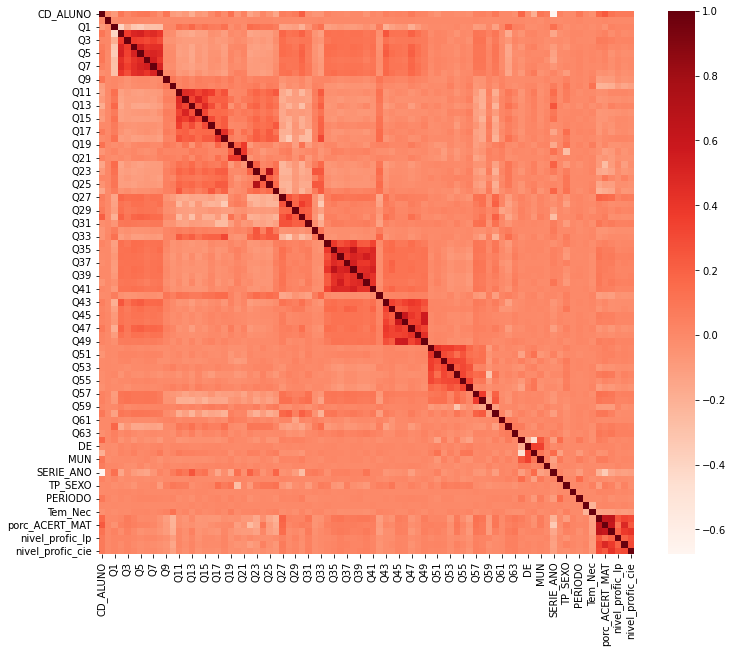

In [15]:
from matplotlib import pyplot


plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor,  cmap=plt.cm.Reds)
plt.show() 

Após analise das variáveis, foram removidas features que são relacionadas com a variavel resposta e não faziam sentido estar no conjunto de treino. Pelo problema aqui proposto ser prever a nota de matematica na prova en questão, as demais notas de outras disciplinas tambem não estão disponiveis no momento de previsão, portanto serão retiradas. 

In [16]:
#retirada de variaveis futuras, que são resposta.(Só deixar a que for prever)

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
#dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)


Tambem foram retiradas as variaveis com informações sistemas, que para nós como não relacionaremos nosso dataset com nenhuma outra base, são irrelevantes.

In [17]:
#remocao de variaveis de identificação sistemica

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)


In [18]:
CA.relevantFeatures(dataTrain,'porc_ACERT_MAT',0.2)

Q10               0.207009
Q22               0.260933
SERIE_ANO         0.337656
porc_ACERT_MAT    1.000000
Name: porc_ACERT_MAT, dtype: float64

In [19]:
x = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
y = dataTrain['porc_ACERT_MAT']

Aplicou-se o metodo GridSearch para estimar parametros do nosso modelo, consistindo em realizar todas as combinações de parametros fornecidas pelo cientista.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
param_grid = {'n_estimators':[1,10,100,200],
                'max_depth': [5,10,15],
                'min_samples_split':[2,3,5,8]}

score = scoring=['neg_mean_squared_error','r2']

grid_cv = RandomizedSearchCV(model,param_grid,scoring=score,cv=10,verbose=3,refit='neg_mean_squared_error')

grid_cv.fit(x_train,y_train)
print("R2::{}".format(grid_cv.best_score_))
print("hiperparametro melhor::{}".format(grid_cv.best_params_))

pd.DataFrame(data = grid_cv.cv_results_).head(3)

best_model = grid_cv.best_estimator_

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

tree = DecisionTreeRegressor(criterion='mse')    

model = RandomForestRegressor(n_estimators=200,criterion='squared_error',max_depth=15, min_samples_split= 2,min_samples_leaf=2)
#model = GradientBoostingRegressor(loss='squared_error', learning_rate= 0.1 , n_estimators = 100)

model.fit(x, y)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()   

model.fit(x, y)

In [22]:
df = pd.read_csv('SARESP_test.csv')

df = df.dropna(axis=1, thresh=int(len(df)/10), how="Any")
df = CA.typeEncoder(df,'object')

dataTrain = df.drop(['porc_ACERT_lp'],axis=1)
#dataTrain = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
dataTrain = dataTrain.drop(['porc_ACERT_CIE'],axis=1)
#dataTrain = dataTrain.drop(['nivel_profic_lp'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_mat'],axis=1)
dataTrain = dataTrain.drop(['nivel_profic_cie'],axis=1)

dataTrain = dataTrain.drop(['CD_ALUNO'],axis=1)
dataTrain = dataTrain.drop(['NOMESC'],axis=1)
dataTrain = dataTrain.drop(['MUN'],axis=1)

x_test = dataTrain.drop(['porc_ACERT_MAT'],axis=1)
y_test = dataTrain['porc_ACERT_MAT']

In [23]:
pred = model.predict(x_test)

In [24]:
CA.regScore(model,x_test,y_test,pred)

R2:0.377
MSE:287.467
MAE:13.858


Após as primeiras previsões o resultado não foi muito satisfatório, foi feita então mais uma tentativa de fit só que foi realizada a remoção de variaveis correlacionadas entre sí, deixando apenas uma de cada relacionamento forte. Porem os resultados não melhoraram significantemente.

Foi feito tambem um teste com um modelo de regressão simples para comparar performance de dois modelos diferentes, provando a hipotese de que o random Forest inicialmente aplicado e ajustado com gridsearch performa melhor.